# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kumareshvj/EDA

# **Problem Statement** 




1. Distribution of rooms across the neighbourhood group
2. Comparision of room types across the neighbourhood group
3. Checking the room availablity as per the neighourhood group
4. Distribution of room types with the price
5. Reviews as per the room types
6. busiest host
7. correlation betweeen the variable
8. Room avilablity with respect to the price








#### **Define Your Business Objective?**

Business objective to add the more detail to the customer and host to reduce the hustle of most common question.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [105]:
#importing the libary for the data wrangling, data cleaning and visulaziation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib

### Dataset Loading

In [106]:
# Load Dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AlmaBetter/capstone project/Python_for_data science/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [107]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [108]:
# Dataset Rows & Columns 
airbnb_df.shape

(48895, 16)

### Dataset Information

In [109]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [110]:
# Dataset Duplicate Value Count
airbnb_df.duplicated(subset = None, keep = 'first')

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

#### Missing Values/Null Values

In [111]:
# Missing Values/Null Values 
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [112]:
# Visualizing the missing values
airbnb_df[(airbnb_df['host_name'].isna() | (airbnb_df['host_id'].isna()) | (airbnb_df['last_review'].isna()))]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### What did you know about your dataset?

The dataset we are working on comprises 48895 rows and 16 columns. However, we have identified that there are 16 null values in the 'name' column and 21 null values in the 'host_name' column. These null values will not affect our analysis, so we will replace them with appropriate values. Additionally, we have identified 10052 null values in the 'last_review' and 'reviews_per_month' columns. These null values could be due to the fact that these rooms have not been booked before. Therefore, we plan to fill these values with the appropriate data.


## ***2. Understanding Your Variables***

In [113]:
# Dataset provide all the Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [114]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

id - unique_ID

name - names of the listing

host_id - unique host_Id

host_name - name of the listers

neighbourhood_group - location

neighbourhood - area

latitude - GPS cordinates                          

longitude - GPs cordinates                        

room_type  - types of listing                       

price   - price of listing                          

minimum_nights - minumum no of nights to be pay

number_of_reviews - number of reviews                

last_review - last reviewed date                      

reviews_per_month - total reviews per month                

calculated_host_listings_count - Total no of listing by host   

### Check Unique Values for each variable.

In [115]:
# Check Unique Values for each variable.
airbnb_df['neighbourhood'].unique()
len(airbnb_df['neighbourhood'].unique())

221

In [116]:
# finding the unique value in neighbourhood group
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [117]:
# finding the unique values in room types
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [118]:
# Write your code to make your dataset analysis ready.

In [119]:
#filling the NAN with zero
airbnb_df.fillna(0,inplace=True)

In [120]:
# counting an indexing  the list of room in each neighbouhoog group
neighbourhood_group_index = airbnb_df.neighbourhood_group.value_counts().index
neighbourhood_group_value =airbnb_df.neighbourhood_group.value_counts().values
print(neighbourhood_group_value)

[21661 20104  5666  1091   373]


In [121]:
#grouping the room_type and neighbourhood_group and counting the neighbourhood_group with respect to room_type
neighbourhoodGroup_roomType =airbnb_df.groupby(['room_type','neighbourhood_group'])['neighbourhood_group'].count().unstack()

In [122]:
#grouping the neighourhood_group and room_type with respect to max number review 
roomType_reviews = airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().unstack()

In [123]:
#grouping the neighourhood_group and room_type with respect to max number review 
Review_with_respect_roomtype_neighourhood_group =airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().unstack()

In [124]:
#Grouping the host name with respect to calculated host listings count
TOP_listed_host = airbnb_df.groupby(['host_name'])['calculated_host_listings_count'].count().sort_values(ascending = False).reset_index().head(10)

In [125]:
#Grouping the host name and neighbourhood group with respect to calculated host listings count
TOP_listed_host_neighbourhood_group = airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().sort_values(ascending = False).reset_index().head(10)



In [126]:
# creating the new dataframe by filtering the availablity 365 equal to 0
Zero_availability = airbnb_df[airbnb_df['availability_365'] == 0]

In [127]:
# creating the new dataframe by grouping the host name and room type with respect to max of number of reviews
Zero_availability_TOP10 = Zero_availability.groupby(['host_name','room_type'])[('number_of_reviews')].max().sort_values(ascending = False).reset_index().head(10)

In [128]:
# Creating the new dataframe for the most reviewed host name
Most_reviewed = airbnb_df.groupby(['host_name','room_type'])[('number_of_reviews')].max().sort_values(ascending = False).reset_index().head(10)

In [129]:
#Creating the new dataframe for the most reviewed by room type
reviewed_by_roomtype = airbnb_df.groupby('room_type')[('number_of_reviews')].count().sort_values(ascending = False).reset_index()

In [130]:
# creating the new data for the value below the lower fence
q1 = airbnb_df['price'].quantile(0.25)
q3 = airbnb_df['price'].quantile(0.75)
print(q3)
iqr = q3-q1
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
print(fence_high)
outliers = airbnb_df.loc[(airbnb_df['price']<fence_high)]
outliers.sort_values(by='price',ascending=False)

175.0
334.0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15150,12093494,Midtown Sleep 6 Central Convenience,62031986,Adam,Manhattan,Midtown,40.75237,-73.98769,Entire home/apt,333,1,246,2019-06-21,6.38,1,323
38565,30327469,Parisian Palace in Heart of Manhattan,224001464,Aleszea,Manhattan,Chelsea,40.73734,-73.99327,Entire home/apt,333,4,4,2019-05-29,1.41,1,80
28062,21919913,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,76104209,Rated,Manhattan,Upper West Side,40.77055,-73.98615,Entire home/apt,333,30,0,0,0.00,33,330
25161,20154569,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,35635299,Mel,Manhattan,Midtown,40.74353,-73.98364,Entire home/apt,333,30,66,2019-06-23,2.81,1,210
48567,36315904,Your Private Duplex Mansion in the HEART of NYC!,269146714,Clinton,Manhattan,West Village,40.73670,-74.00105,Entire home/apt,333,2,0,0,0.00,1,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [131]:
#filter the dataframe for the zero number of reviews and 365 days availability
airbnb_df[(airbnb_df['number_of_reviews'] == 0) & (airbnb_df['availability_365'] == 365)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.0,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0,0.0,1,365
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,0,0.0,1,365
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,0,0.0,3,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48744,36415840,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,223715460,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,0,0.0,1,365
48844,36453952,West Village Studio on quiet cobblestone street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,0,0.0,1,365
48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,0,0.0,6,365
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0,0.0,3,365


In [132]:
#filter the dataframe for the non zero number of reviews and 365 days availability
airbnb_df[(airbnb_df['number_of_reviews'] != 0) & (airbnb_df['availability_365'] == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46532,35292625,Room-cabin in Hell's kitchen,137191484,Maria,Manhattan,Hell's Kitchen,40.76479,-73.98667,Private room,86,1,1,2019-06-05,0.88,5,0
46583,35329913,Charming Brooklyn Garden apt - historic Macdon...,46724430,Mariana,Brooklyn,Bedford-Stuyvesant,40.68364,-73.92307,Entire home/apt,125,3,1,2019-07-01,1.00,1,0
47175,35615687,Duplex Apartment 3 bedroom 2 bath (6 guest),145082728,Jason & Kelly,Brooklyn,Bedford-Stuyvesant,40.68091,-73.95006,Entire home/apt,350,2,1,2019-06-30,1.00,2,0
47218,35642891,Beautiful room in Bushwick,268138154,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2019-06-18,2.00,1,0


In [133]:
# creating the dataframe using only the variable column only
airbnb_correlation = airbnb_df[['latitude','longitude','room_type','price','minimum_nights','reviews_per_month',
             'number_of_reviews','calculated_host_listings_count','availability_365']]

In [134]:
# creating the dataframe using specfic variable column only
airbnb_new_df = airbnb_df[['room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365','reviews_per_month']]

In [135]:
#creating the new column for date, year and month 
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['Days'], airbnb_df['Month'], airbnb_df['Years'] = (airbnb_df['last_review'].dt.day, airbnb_df['last_review'].dt.month, airbnb_df['last_review'].dt.year)
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review']).dt.date
# when column with NAN value in the year it will be filled with 1970 so we are removing the data of 1970
fitered_years_df = airbnb_df[airbnb_df['Years']!= 1970]

### What all manipulations have you done and insights you found?

We have divided the date into separate columns for days, months, and years.

We have replaced all null values with zeroes.

There are approximately 10052 null values in the 'reviews_per_month' and 'number_of_reviews' columns.

16 'name' values and 21 'host_name' values were identified as null.

454 rooms have never had any customers.

Approximately 12,688 rooms were fully booked for the entire year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

([<matplotlib.patches.Wedge at 0x7f55841b6df0>,
 [Text(0.21369925310190047, 1.18081862672626, 'Manhattan'),
  Text(-0.71389145910468, -0.9645511829951748, 'Brooklyn'),
  Text(1.0216595896282492, -0.6294534795524112, 'Queens'),
  Text(1.191650970802947, -0.14130804571712827, 'Bronx'),
  Text(1.1996553977521107, -0.02875633224569755, 'Staten Island')],
 [Text(0.12465789764277525, 0.6888108655903181, '44.30%'),
  Text(-0.41643668447772997, -0.5626548567471853, '41.12%'),
  Text(0.595968093949812, -0.3671811964055732, '11.59%'),
  Text(0.6951297329683858, -0.08242969333499148, '2.23%'),
  Text(0.6997989820220646, -0.01677452714332357, '0.76%')])

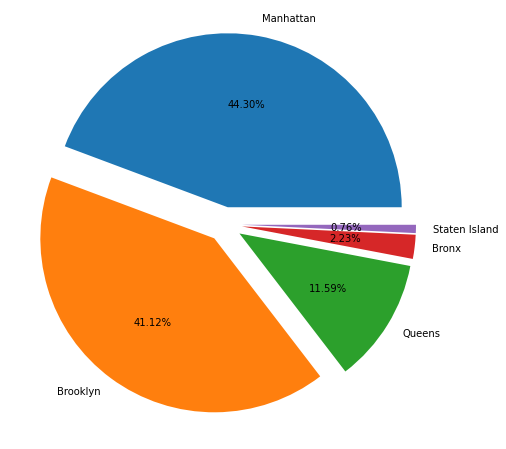

In [136]:
# Chart - 1 visualization code
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.pie(neighbourhood_group_value,labels = neighbourhood_group_index,autopct='%1.2f%%',explode =(0.1,0.1,0.1,0.1,0.1))

##### 1. Why did you pick the specific chart?

PIE chart is used to check the proporation of the categotical variable, so we have used to check the proporation of room list in the neighourhood.

##### 2. What is/are the insight(s) found from the chart?

Around 44.30% (no of rooms 21661) of listed rooms are in Manhattan, followed by Brooklyn with around 41.12% (no of rooms 20104) of listed rooms.



Staten Island has the fewest listings, with only 0.76% (no of rooms 373). 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One potential strategy to increase occupancy rates in Staten Island and the Bronx could be to explore recruiting more hosts in those areas. The fact that the proportion of listed rooms in those areas is below 2.5% suggests that there may be a lack of available options for customers in those areas. By recruiting more hosts and increasing the number of available listings, you may be able to attract more customers and improve occupancy rates in those areas. 

#### Chart - 2

Text(0.5, 0, 'Neighbourhood')

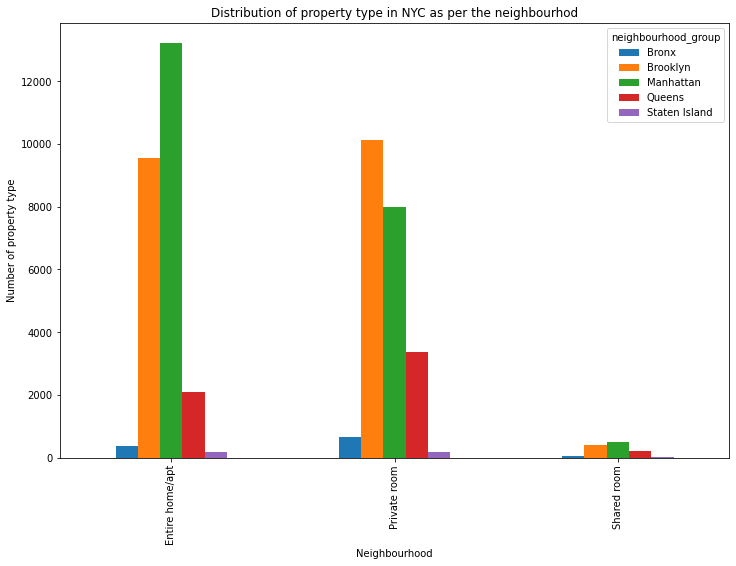

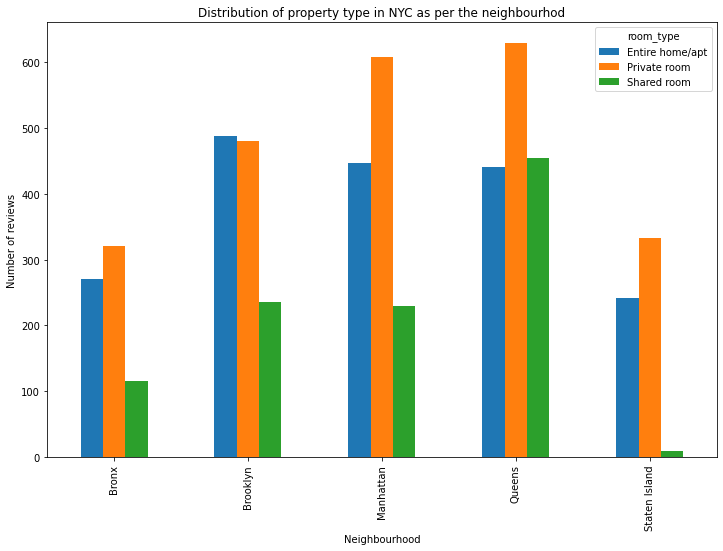

In [137]:
# Chart - 2 visualization code

plt.rcParams['figure.figsize'] = (12,8)
neighbourhoodGroup_roomType.plot(kind = 'bar')
plt.title('Distribution of property type in NYC as per the neighbourhod')
plt.ylabel('Number of property type')
plt.xlabel('Neighbourhood')

plt.rcParams['figure.figsize'] = (12,8)
roomType_reviews.plot(kind = 'bar')

plt.title('Distribution of property type in NYC as per the neighbourhod')
plt.ylabel('Number of reviews')
plt.xlabel('Neighbourhood')



##### 1. Why did you pick the specific chart?

Barchart is used to the check the distribution category arcoss different area. In above chart we have checked the ditribution room type across neighbourhood 

##### 2. What is/are the insight(s) found from the chart?

Manhattan and brooyln are the pose area in the neighourhood.

Queens and staten island are the outskirts of the city 

Manhattan as the most listed entire home/apt and brooylen as the most listed private room



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It seems that customers are not preferring shared rooms and are avoiding certain areas. This could be due to a variety of factors, such as lack of privacy, noise, or discomfort with the shared living arrangements. 

Customers are not preferring manhanttan and brooklyn due to the high price, so offering competitive prices or discounts for those areas, or highlighting their unique selling points, could be a solution to attract customers.

#### Chart - 3

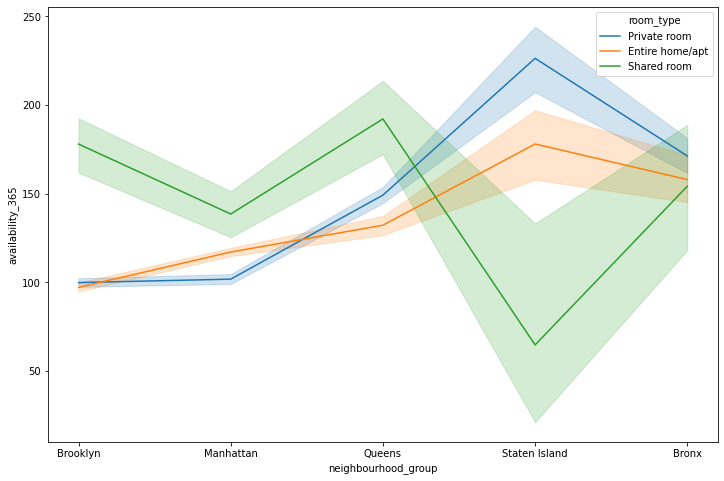

In [138]:
# Chart - 3 visualization code
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.lineplot(data=airbnb_df, x='neighbourhood_group',y= 'availability_365',hue='room_type')

##### 1. Why did you pick the specific chart?

Line chart is used to show the  trend line of the categarical variable using the numerical variable. in our case we are seeing the trend line in the neighbourhood regarding the availablity of the room

##### 2. What is/are the insight(s) found from the chart?

Brooklyn and manhattan are busied host for the private room and entire home/apt

Staten island is the most busied for the shared room and it as more available room in private room and entrie home.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers in Brooklyn, Manhattan and Bronx tend to avoid shared rooms and prefer private or homes/apartments, while customers in Staten Island prefer shared rooms over private or homes/apartments.

we could offer promotions or discounts for shared rooms in Brooklyn, Manhattan, and Bronx, and for private or homes/apt in Staten Island. This strategy would help you to attract different target audiences and increase the occupancy rate in each area.



#### Chart - 4

Text(0.5, 1.0, 'Ditribution of price in neighourhood')

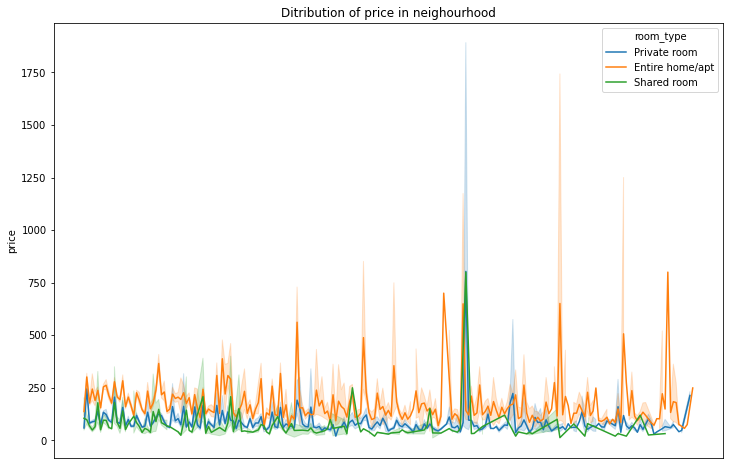

In [139]:
# Chart - 4 visualization code
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=airbnb_df, x='neighbourhood', y='price', hue='room_type')
plt.title('Ditribution of price in neighourhood')

##### 1. Why did you pick the specific chart?

To compare the chages over different categorey

##### 2. What is/are the insight(s) found from the chart?

The pricing of rooms varies by type, with Entire home/apt being the most costly across all neighborhoods, private rooms coming next in terms of pricing and shared rooms being the least expensive among the three.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It appears that the pricing distribution for the different room types is based on the level of privacy and amenities offered. Homes/apartments, which typically offer the most privacy and amenities, have the highest maximum price. Private rooms, which offer less privacy and amenities than homes/apartments, have a median price. Shared rooms, which offer the least privacy and amenities, have the lowest price. This pricing strategy is likely based on the idea that customers are willing to pay more for more privacy and amenities. It's also a good strategy to increase occupancy rate for shared rooms by keeping the price low.


#### Chart - 5

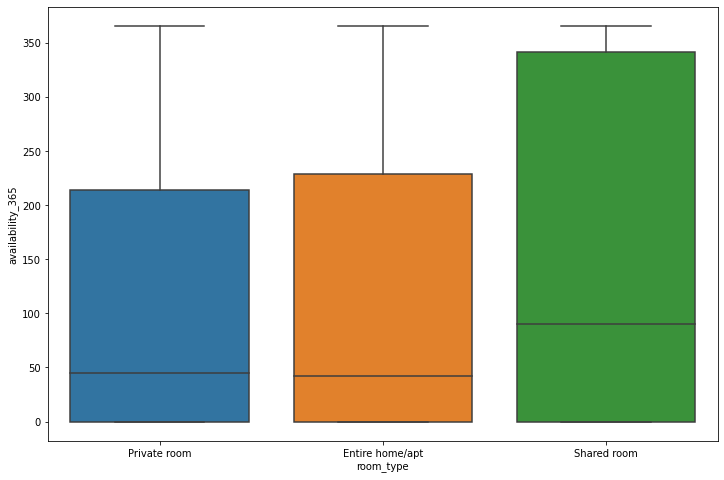

In [140]:
# Chart - 5 visualization code
sns.boxplot(x=airbnb_df['room_type'],y=airbnb_df['availability_365'])

##### 1. Why did you pick the specific chart?

The box plot is useful for identifying outliers and skewness, outliers are points that falls far away from the other points and skewness is the degree of departure of a distribution from symmetry. It can also be used to compare the distribution of multiple sets of data, as the box and whiskers can be plotted side-by-side to make comparisons between groups.

##### 2. What is/are the insight(s) found from the chart?

25% of the rooms are completely booked for all the room type
private rooms and entire home/apt are most booked when to check the median line and 75 percentile line

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It seems that private rooms and entire homes/apartments are the most preferred room types for bookings, while shared rooms are least preferred.

It's important to identify the reasons for this preference and make sure that shared rooms are meeting the customer's needs and providing an adequate level of privacy and amenities.

#### Chart - 6

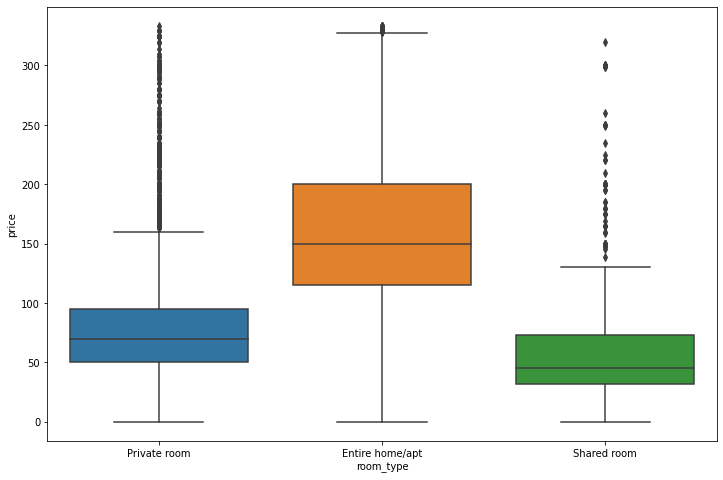

In [141]:
# Chart - 6 visualization code
sns.boxplot(x=outliers['room_type'],y=outliers['price'])


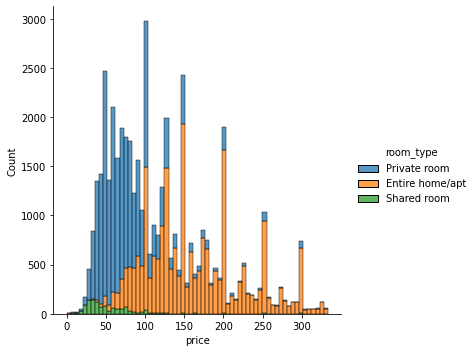

In [142]:
sns.displot(x=outliers['price'],hue=outliers['room_type'],multiple="stack")


##### 1. Why did you pick the specific chart?

The box plot is useful for identifying outliers and skewness, outliers are points that falls far away from the other points and skewness is the degree of departure of a distribution from symmetry. It can also be used to compare the distribution of multiple sets of data, as the box and whiskers can be plotted side-by-side to make comparisons between groups.

The dist plot is useful to show the frequency at which each value in a dataeset occurs. the x-axis represent the values of the dataset and the y-axis represent the frequency of those values

##### 2. What is/are the insight(s) found from the chart?

The prices for all room types are distributed in a left-skewed pattern.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The pricing strategy for entire homes/apartments is to charge a higher rate, with prices ranging from 120 to 200. The pricing strategy for private rooms is to charge a lower rate, with prices ranging from 50 to 100. And, the pricing strategy for shared rooms is to charge the lowest rate, with prices ranging from 30 to 60. This pricing strategy aligns with the level of privacy and amenities offered by each room type, with entire homes/apartments offering the most privacy and amenities and shared rooms offering the least. 

#### Chart - 7

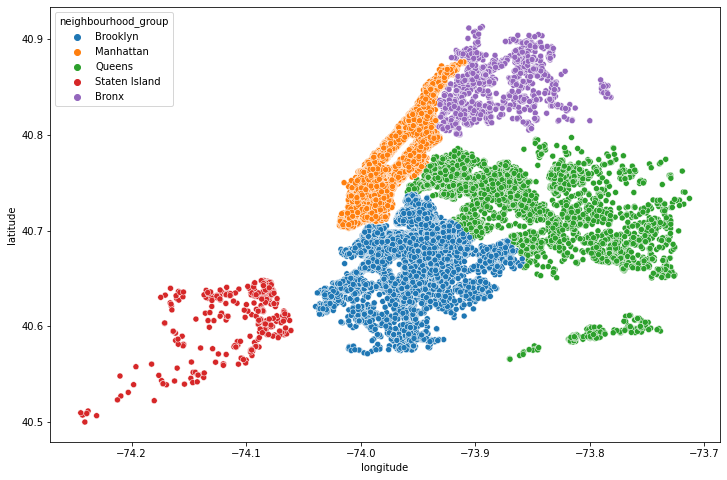

In [143]:
# Chart - 7 visualization code
sns.scatterplot(data=airbnb_df,x="longitude", y="latitude",hue='neighbourhood_group')


##### 1. Why did you pick the specific chart?

Compared to the other neighbourhood groups, Staten Island has the lowest room density.

##### 2. What is/are the insight(s) found from the chart?

Staten island is the less densed compared with remaining neighbourhood group

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It sounds like there is still potential for discovering more rooms in Staten Island. This could be a great opportunity to increase occupancy rates in that area. One way to discover more rooms in Staten Island would be to reach out to potential hosts in the area and encourage them to list their properties.

we could also offer promotions or discounts to customers who book a room in Staten Island to incentivize them to choose that area

#### Chart - 8

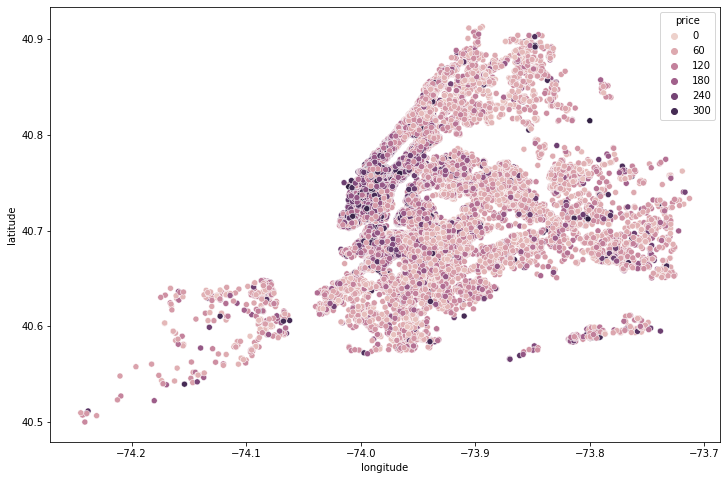

In [144]:
# Chart - 8 visualization code palette='BuPu'
sns.scatterplot(data = outliers,x="longitude", y="latitude",hue='price')

##### 1. Why did you pick the specific chart?

Scatter plot is used to visualize the distribution of the data and to identify cluster

##### 2. What is/are the insight(s) found from the chart?

The areas west of Manhattan and east of Brooklyn are among the most expensive in New York City.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The areas west of Manhattan and east of Brooklyn are popular tourist destinations in New York City. This could be due to a variety of factors such as proximity to popular attractions, diverse neighborhoods, and easy access to transportation. 

#### Chart - 9

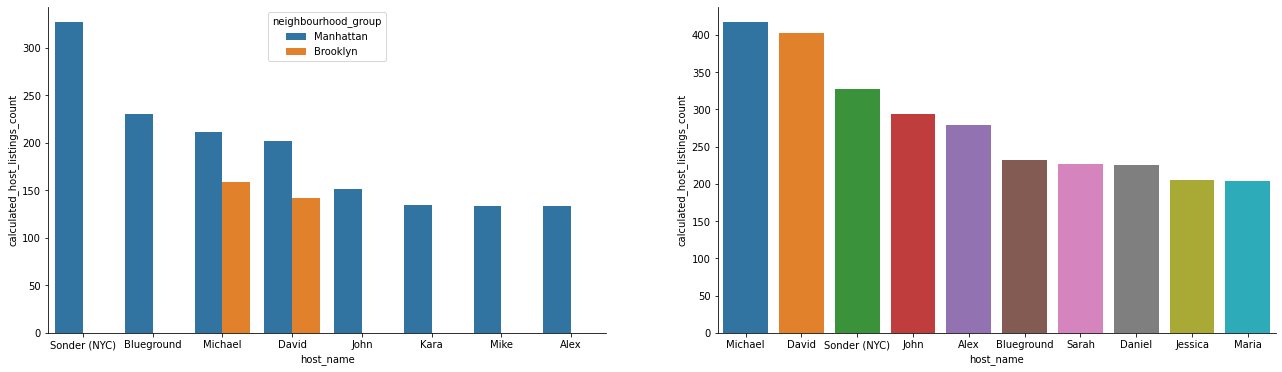

In [145]:
# Chart - 9 visualization code
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

ax = axes.flatten()

sns.barplot(data = TOP_listed_host_neighbourhood_group,x='host_name',y='calculated_host_listings_count',hue ='neighbourhood_group',ci=None,ax=ax[0])
sns.barplot(data = TOP_listed_host,x='host_name',y='calculated_host_listings_count',ci=None,ax=ax[1])
sns.despine(fig)

##### 1. Why did you pick the specific chart?

bar chart is used to comparing the values of different groups and used to compare the size.

##### 2. What is/are the insight(s) found from the chart?

Based on the data presented, Top listed host are michael, david and sonder (NYC) and listed in manhattan and brooklyn neighbouhood group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It appears that the top 10 listed rooms by host max in the area of Manhattan and Brooklyn

#### Chart - 10

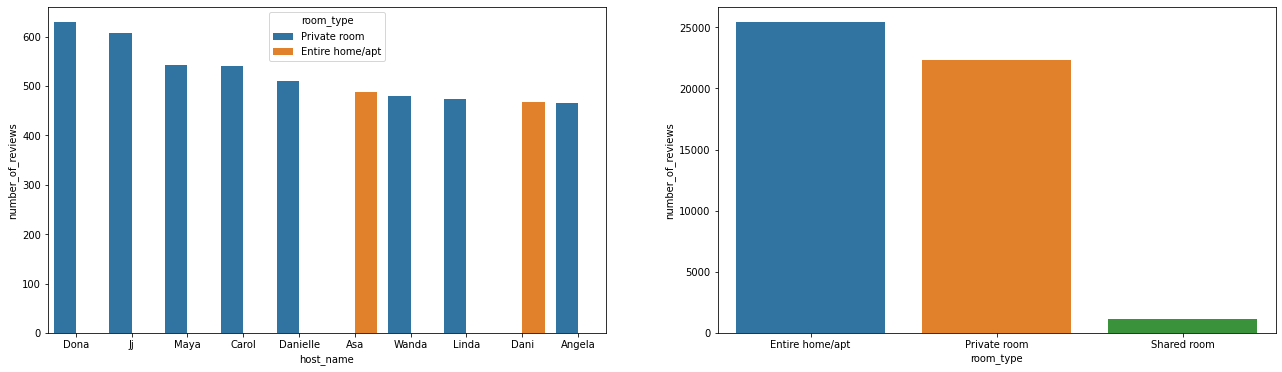

In [146]:
# Chart - 10 visualization code
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

ax = axes.flatten()

sns.barplot(data = Most_reviewed, x ='host_name',y = 'number_of_reviews',hue='room_type',ax=ax[0])
sns.barplot(data = reviewed_by_roomtype,x='room_type',y='number_of_reviews',ci = None,errwidth=0,ax=ax[1])

#airbnb_df.groupby(['host_name','availability_365','room_type'])['number_of_reviews'].max().sort_values(ascending = False).head(10)
#print(Most_reviewed)

##### 1. Why did you pick the specific chart?

bar chart is used to comparing the values of different groups and used to compare the size.

##### 2. What is/are the insight(s) found from the chart?

Most reviews room type is entire home/apt followed by private room and then it is shared room
Top 3 host in respect to reviews are Dona, Jj and Maya

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers tend to prefer entire homes/apartments and private rooms over shared rooms. 

It sounds like Dona, Jj, and Maya are among the most reviewed hosts. This suggests that they have a high level of customer satisfaction and likely have a consistent ability to accommodate guests.

#### Chart - 11

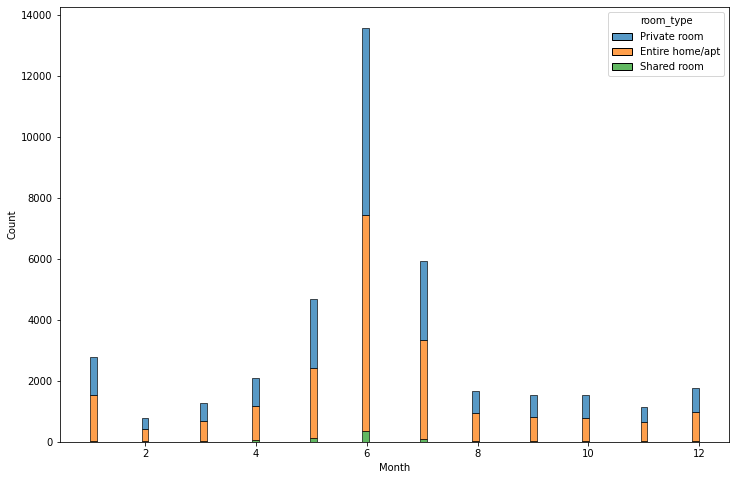

In [147]:
# Chart - 11 visualization code

sns.histplot(data=fitered_years_df, x='Month', hue='room_type', multiple="stack")



##### 1. Why did you pick the specific chart?

bar chart is used to comparing the values of different groups and used to compare the size.

##### 2. What is/are the insight(s) found from the chart?

The majority of customers visit in June, followed by July and May. 

The least number of customers visit in February, followed by November and March.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This pricing strategy, known as dynamic pricing, is a common practice in many industries. It involves adjusting prices based on factors such as supply and demand, competition, and consumer behavior. By increasing prices during peak seasons and decreasing them during slower seasons, businesses can optimize their revenue. However, it's important to consider the impact on customer loyalty, as some customers may not appreciate sudden price increases.

#### Chart - 12

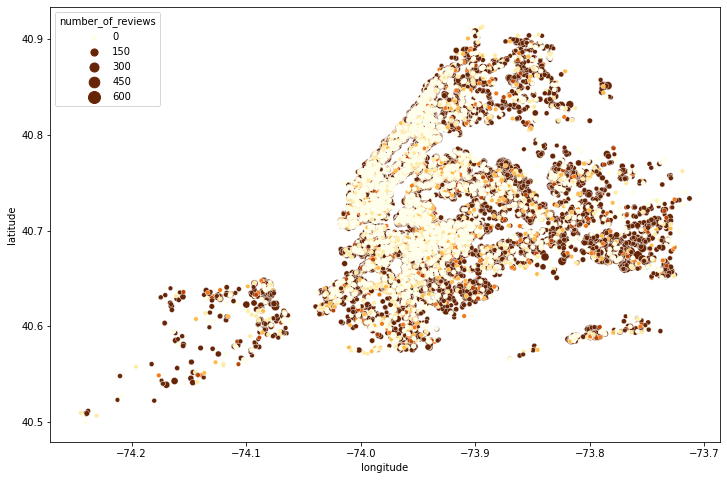

In [148]:
# Chart - 12 visualization code
sns.scatterplot(data = outliers,x="longitude", y="latitude",hue='number_of_reviews',size="number_of_reviews", sizes=(20, 150),palette='YlOrBr', hue_norm=(0, 5))

##### 1. Why did you pick the specific chart?

Scatter plot is used to visualize the distribution of the data and to identify cluster

##### 2. What is/are the insight(s) found from the chart?

Customers are opting for the outskirts of the city rather than Manhattan and Brooklyn due to their high price of room.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Lowering the price of rooms in Manhattan and Brooklyn could be a strategy to increase occupancy rates. By making the rooms more affordable, more customers may be willing to book them, which would result in a higher occupancy rate. 

#### Chart - 13

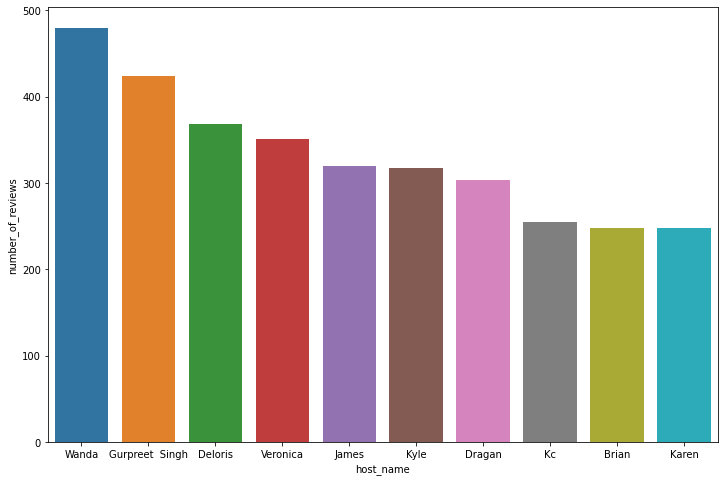

In [149]:
# Chart - 13 visualization code

sns.barplot(data = Zero_availability_TOP10, x ='host_name',y = 'number_of_reviews')

##### 1. Why did you pick the specific chart?

bar chart is used to comparing the values of different groups and used to compare the size.

##### 2. What is/are the insight(s) found from the chart?

The top 3 hosts in terms of number of reviews and availability are Wanda, Gurpreet Singh, and Deloris.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Wanda, Gurpreet Singh, and Deloris are the top 3 hosts in terms of number of reviews and availability. This indicates that these hosts have a high level of customer satisfaction, as well as a consistent ability to accommodate guests. It could be a good idea to reach out to these hosts and ask them to share their best practices, or try to emulate their successful strategies to improve your own performance.

#### Chart - 14 - Correlation Heatmap

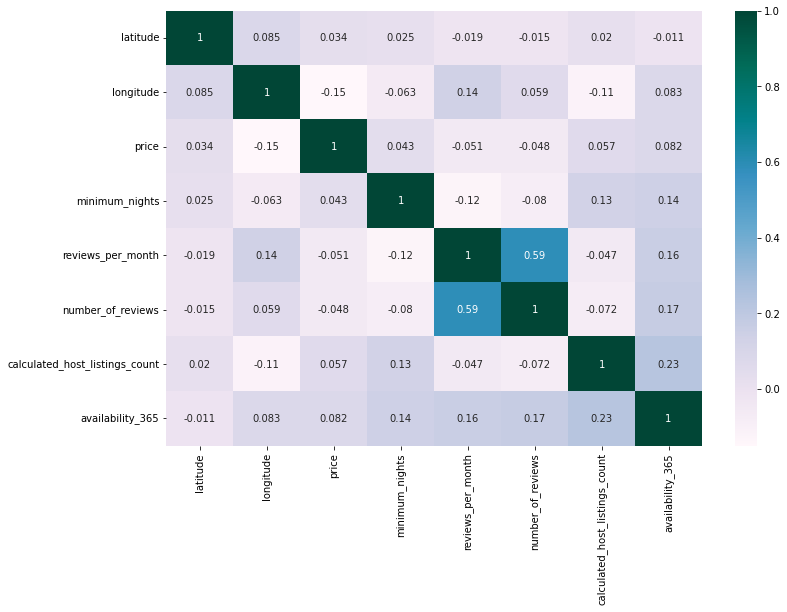

In [150]:
# Correlation Heatmap visualization code
sns.heatmap(airbnb_correlation.corr(), annot=True, cmap='PuBuGn')


##### 1. Why did you pick the specific chart?

Heatmap is used to visualize the correlation between different features of a dataset. It is a matrix plot where each cell is filled with a color that represents the correlation coefficient between the two variables corresponding to the row and column of that cell.

##### 2. What is/are the insight(s) found from the chart?

only review per month and number of reviews are correlated remaning columns are not correlated with each other.

#### Chart - 15 - Pair Plot 

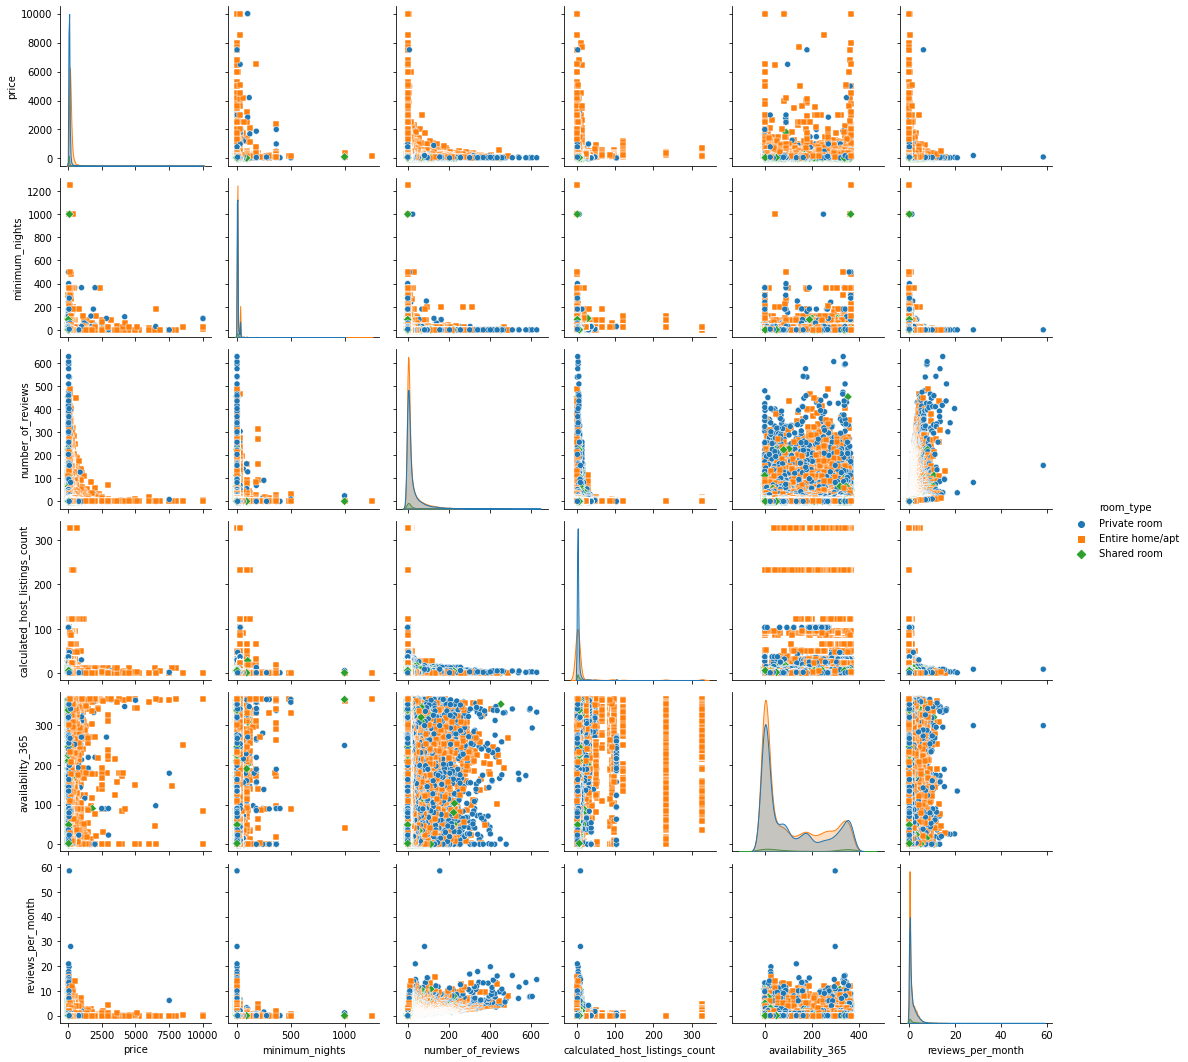

In [151]:
# Pair Plot visualization code

sns.pairplot(airbnb_new_df, hue = 'room_type',markers=["o", "s", "D"])

##### 1. Why did you pick the specific chart?

Pair plot is quickly visualize relationships between different variables in a dataset and to identify patterns or outliers

##### 2. What is/are the insight(s) found from the chart?

A skewed data means that the data is not evenly distributed and tend to lean towards one side of the distribution. In this case, the chart is showing a left-skewed distribution. This means that the majority of the data is concentrated on the right side of the chart and there are relatively few data points on the left side. This type of distribution is also known as negatively skewed distribution. The tail is longer on the left side and the mean is less than the median. The most common causes of left-skewed data are the presence of outliers and/or the presence of a minimum value that keeps data from being distributed evenly.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 


Based on the current data, we cannot confirm the quality of the stay. To overcome this, we recommend adding a star rating review column to the data. This will provide customers with a clear understanding of the quality of the stay and alleviate any concerns they may have about the location.

In addition, we suggest adding a star rating column for the hosts as well, to provide an understanding of the quality of service provided by the host.

We also suggest adding columns for car parking availability and pet stay, as this information would be helpful for customers who are traveling with a car or pet.

To further improve the customer experience, we recommend providing the distance of the nearest metro and bus stop, so that customers can easily gauge the proximity of public transportation to the room.









# **Conclusion**

one strategy to increase occupancy rates in Staten Island and the Bronx could be to recruit more hosts and increase the number of available listings. 

The private rooms and entire homes/apartments are the most preferred room types for bookings, while shared rooms are least preferred.

Lowering the price of rooms in Manhattan and Brooklyn could also be a strategy to increase occupancy rates. 

The areas west of Manhattan and east of Brooklyn are popular tourist destinations in New York City, likely due to their proximity to popular attractions, diverse neighborhoods, and easy access to transportation.

Wanda, Gurpreet Singh, and Deloris are the top 3 hosts in terms of number of reviews and availability. This suggests that these hosts have a high level of customer satisfaction and consistent ability to accommodate guests. It may be beneficial to reach out to these hosts to learn their best practices and implement similar strategies to improve performance.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***